# Advanced Optimization Methods

## Homework Assignment 2

Please submit the single Jupyter Notebook file, where only Python and Markdown/LaTeX are used. The submission should be in the following format: YourName_HW2.ipynb.

You are free to modify the function templates and use additional libraries. However, do not use built-in functions if the assignment requires you to implement the method from scratch. Do not forget to add necessary explanations and comments.


The works will be checked for plagiarism. The score will be divided by the number of similar works.

### Problem 1

### 1.1 (2 pts)

Consider the function

$$
f(x) = \frac{1}{2}\|Ax - b\|_2^2,
$$

where $A \in \mathbb{R}^{m \times n}$.

- Compute the gradient of $f$.

- Show that $\nabla f$ is Lipschitz continuous with constant  
   
   $L = \|A^\top A\|_2$.
   

- For gradient descent, determine the largest allowable step size  
   $\alpha < \frac{2}{L}$
   that ensures convergence.

___

1. Gradient computation:

$$
f(x) = \frac{1}{2}\|Ax - b\|_2^2 = \frac{1}{2}(Ax - b)^\top (Ax - b)
$$
$$
\nabla f(x) = A^\top (Ax - b)
$$

2. Lipschitz continuity:

For any $x, y \in \mathbb{R}^n$:
$$
\|\nabla f(x) - \nabla f(y)\| = \|A^\top A(x - y)\| \leq \|A^\top A\|_2 \|x - y\|
$$
-> $\nabla f$ is Lipschitz continuous with $L = \|A^\top A\|_2$.

3. Step size for gradient descent:

From theory, for gd convergence we need $\alpha < \frac{1}{L}$. The largest allowable step size is $\alpha_{\max} = \frac{1}{\|A^\top A\|_2}$.

### 1.2 (2 pts)
Consider Lemma 12 from the lecture notes:  
- Let $f$ be a differentiable, $L$-smooth function. Then
$$
    f(x) \le 
    f(y) + \langle \nabla f(y),\, x - y \rangle 
    + \frac{L}{2} \| x - y \|^{2}
    \quad \stackrel{\text{def}}{=} \quad g(x)
$$
for all $x,y \in \mathbb{R}^d$.
 
Find the optimal $x$ that minimizes the upper bound $g(x)$.

- Prove that
$$
\| \nabla f(y)\|^2  \leq 2 L (f(y) - f^*)
$$
for all $y \in \mathbb{R}^d$, where $f^* = \min_x f(x)$.

___

1. Minimizing $g(x)$:

1.1 $\nabla_x \langle \nabla f(y), x - y \rangle = \nabla_x \langle \nabla f(y), x \rangle - \langle \nabla f(y), y \rangle = \nabla f(y)$

1.2 $\nabla_x \left( \frac{L}{2} \|x - y\|^2 \right) = \frac{L}{2} \cdot 2(x-y) = L(x-y)$

$$
\nabla g(x) = \nabla f(y) + L(x - y) = 0
$$
Therefore:
$$
x^* = y - \frac{1}{L}\nabla f(y)
$$

2. Proving the inequality:

$$
f(x^*) \leq f(y) + \langle \nabla f(y), x^* - y \rangle + \frac{L}{2}\|x^* - y\|^2
$$

$f(x^*) = f^*$:
$$
0 \leq f(y) - f^* + \langle \nabla f(y), x^* - y \rangle + \frac{L}{2}\|x^* - y\|^2
$$
Minimizing over $x^*$:
$$
\min_x \left[\langle \nabla f(y), x - y \rangle + \frac{L}{2}\|x - y\|^2\right] = -\frac{1}{2L}\|\nabla f(y)\|^2
$$
Therefore:
$$
0 \leq f(y) - f^* - \frac{1}{2L}\|\nabla f(y)\|^2
$$
$$
\|\nabla f(y)\|^2 \leq 2L(f(y) - f^*)
$$

### 1.3 (4 pts)

Consider the quadratic function:

$$
f(x) = \frac{1}{2}x^T A x + b^T x
$$

where $A \in \mathbb{R}^{n \times n}$ is a symmetric matrix, $x \in \mathbb{R}^n$, $b \in \mathbb{R}^n$.

Your task is to find the minimum $x^*$ by implementing gradient descent algorithm. (1 pts)

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [180]:
def cost(A, x, b):
    """
    Returns:
    f: the scalar value of the function at point x
    """
    return 0.5 * x.T @ A @ x + b.T @ x


def grad(A, x, b):
    """
    Returns:
        nabla_f: The gradient of the quadratic function at point x
    """
    return A @ x + b


def gradient_descent(f, nabla_f, x_0, gamma_k, K=2500, eps=1e-4):
    '''
    Parameters:
        f: target function
        nabla_f: gradient of the target function
        x_0: start point
        gamma_k: function for calculating the method step
        K: number of iterations (by default 1e3)
        eps: accuracy (by default 1e-5)

        Returns:
            x_opt: the point at which the minimum is reached
            err: error vector, err = [convergence_criterion(x_1), \dots, convergence_criterion(x_K)]
    '''
    x = x_0.copy()
    err = []
    
    for k in range(K):
        gradient = nabla_f(x)
        step = gamma_k(x, gradient)
        x_new = x - step * gradient
        
        err.append(np.linalg.norm(gradient))
        
        if np.linalg.norm(x_new - x) < eps:
            x = x_new
            break
            
        x = x_new
    
    return x, np.array(err)

Generate $A \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ such that $A$ is symmetric positive definite in any way you like and execute the implemented algorithm. You have the flexibility to choose your starting point and convergence criterion. Create a plot showing the values of the convergence criterion against the iteration number for the gradient descent algorithm.
 (1 point)

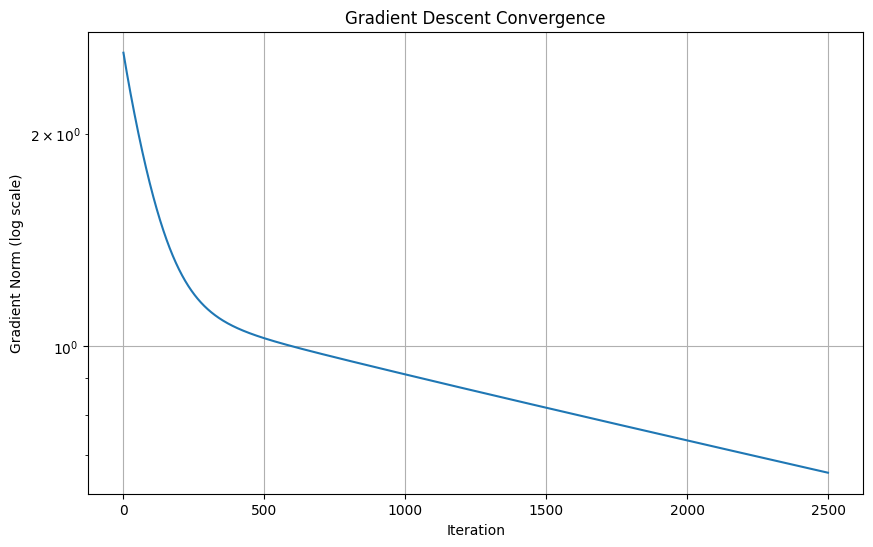

Optimal solution found in 2500 iterations
Final gradient norm: 6.615919e-01


In [181]:
n = 10
np.random.seed(42)

B = np.random.randn(n, n)
A = B.T @ B + 0.1 * np.eye(n) # Make symmetric and positive definite

b = np.random.randn(n)

def gradient(x):
    return grad(A, x, b)

def function(x):
    return cost(A, x, b)

x0 = np.zeros(n)

L = np.linalg.norm(A.T @ A, 2)
alpha = 1.0 / L 

def constant_step(x, gradient):
    return alpha

x_opt, errors = gradient_descent(function, gradient, x0, constant_step)

plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm (log scale)')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()

print(f"Optimal solution found in {len(errors)} iterations")
print(f"Final gradient norm: {errors[-1]:.6e}")

Tune a step of the method, try to make the convergence faster. Add to the previous plot the convergence of the tuned method. Make conclusions and comment on the results. (1 pts)

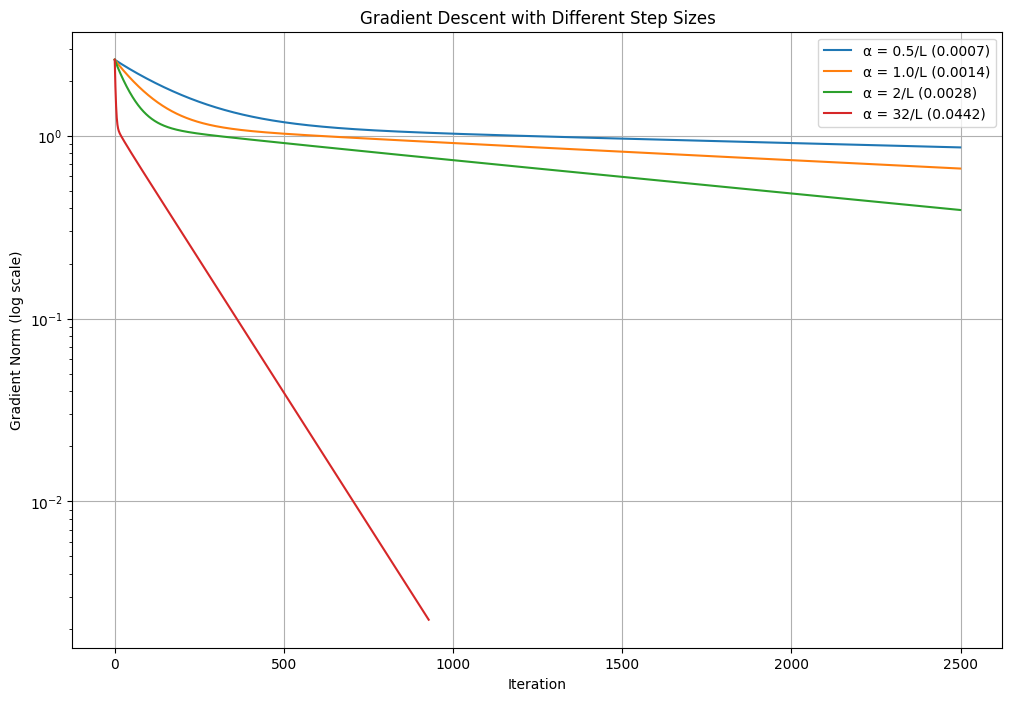

In [182]:
plt.figure(figsize=(12, 8))

for i, step_mult in enumerate([0.5, 1.0, 2, 32]):
    alpha_tuned = step_mult / L
    
    def tuned_step(x, gradient):
        return alpha_tuned
    
    x_opt_tuned, errors_tuned = gradient_descent(function, gradient, x0, tuned_step)
    
    plt.plot(range(len(errors_tuned)), errors_tuned, label=f'α = {step_mult}/L ({alpha_tuned:.4f})')

plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm (log scale)')
plt.title('Gradient Descent with Different Step Sizes')
plt.legend()
plt.grid(True)
plt.show()

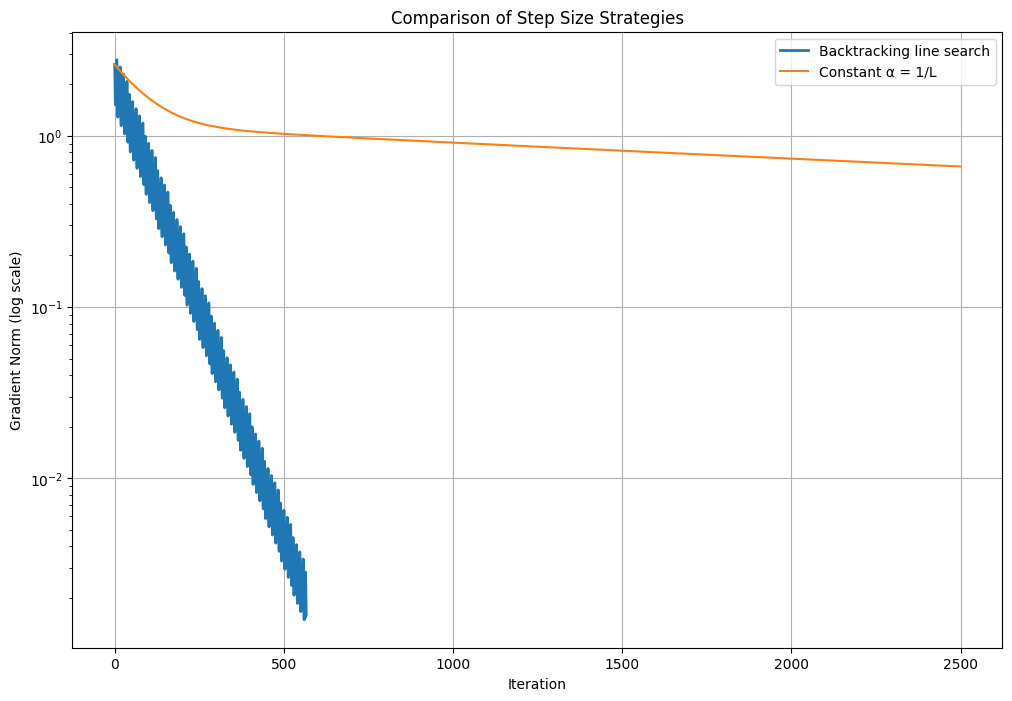

In [183]:
def backtracking_line_search(x, grad_x):
    fx = function(x)
    
    alpha=1.0; beta=0.5; c=1e-4
    while function(x - alpha * grad_x) > fx - c * alpha * np.dot(grad_x, grad_x):
        alpha *= beta
        
    return alpha

plt.figure(figsize=(12, 8))

x_opt_ls, errors_ls = gradient_descent(function, gradient, x0, backtracking_line_search)
plt.plot(range(len(errors_ls)), errors_ls, label='Backtracking line search', linewidth=2)

x_opt_const, errors_const = gradient_descent(function, gradient, x0, constant_step)
plt.plot(range(len(errors_const)), errors_const, label=f'Constant α = 1/L')

plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm (log scale)')
plt.title('Comparison of Step Size Strategies')
plt.legend()
plt.grid(True)
plt.show()

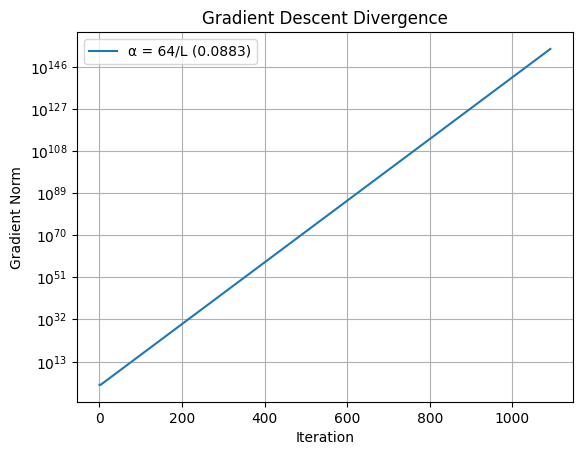

In [202]:
alpha_tuned = 64 / L
x_opt_tuned, errors_tuned = gradient_descent(function, gradient, x0, tuned_step)
plt.plot(range(len(errors_tuned)), errors_tuned, label=f'α = {64}/L ({alpha_tuned:.4f})')

plt.yscale('log')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Descent Divergence')
plt.legend()
plt.grid(True)
plt.show()

### Discussion

For constant step: step size significantly affects convergence speed. If one uses too large value, the result will diverge.  
Backtracking line search adapts step size automatically and converges much faster.

### 1.4 (4 pts)
Your task is to implement a linear regression model using the gradient descent optimizer. We'll use the California Housing dataset from sklearn.

In [185]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

Implement a function for a linear regression model using gradient descent optimization, based on your implementation problem 1.1. (1 pts)

In [187]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Parameters:
    X: numpy array of shape (m, n), where m is the number of samples and n is the number of features
    y: numpy array of shape (m,), the target values
    learning_rate: float, the learning rate for gradient descent (1e-2 by default)
    num_iterations: int, number of iterations to perform (1000 by default)

    Returns:
    weights: numpy array of shape (n,), the learned weights.
    loss: list of floats, the cost function value at each iteration.
    """
    m, n = X.shape
    
    weights = np.random.randn(n) * 0.01
    
    loss_history = []
    for i in range(num_iterations):
        y_pred = np.clip(X @ weights, -1e10, 1e10)
        
        error = y_pred - y
        gradient = (1/m) * X.T @ error
        weights -= learning_rate * gradient

        mse = np.mean(np.clip(error**2, -1e10, 1e10))
        loss_history.append(mse)
        
        if np.linalg.norm(gradient) < 1e-5:
            break
    
    return weights, loss_history

Train your model using the training dataset, and evaluate its performance on the test set using Mean Squared Error (MSE) metric. Plot the cost function over iterations to examine convergence. (1 pts)


Training MSE: 0.5480
Test MSE: 0.5672
Number of iterations completed: 1000


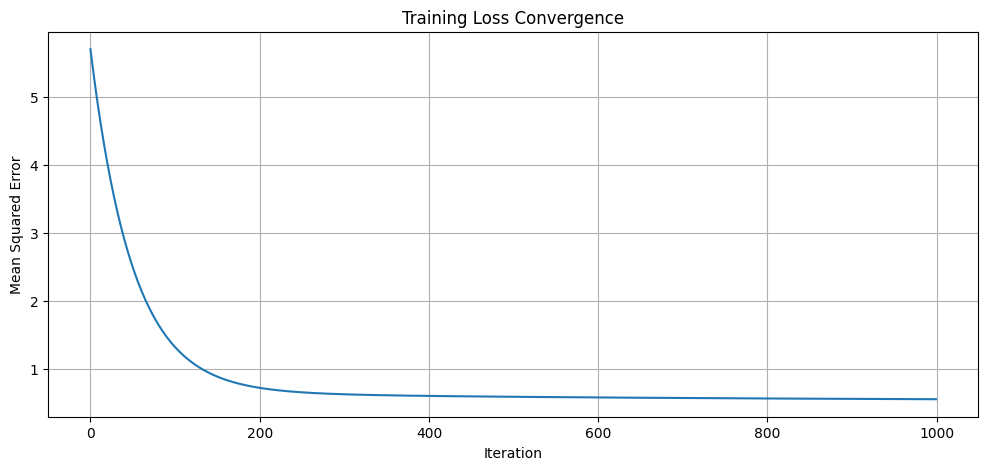

In [188]:
weights, loss_history = linear_regression(X_train_bias, y_train, learning_rate=0.01, num_iterations=1000)

y_train_pred = X_train_bias @ weights
y_test_pred = X_test_bias @ weights

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Number of iterations completed: {len(loss_history)}")

plt.figure(figsize=(12, 5))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss Convergence')
plt.grid(True)
plt.show()

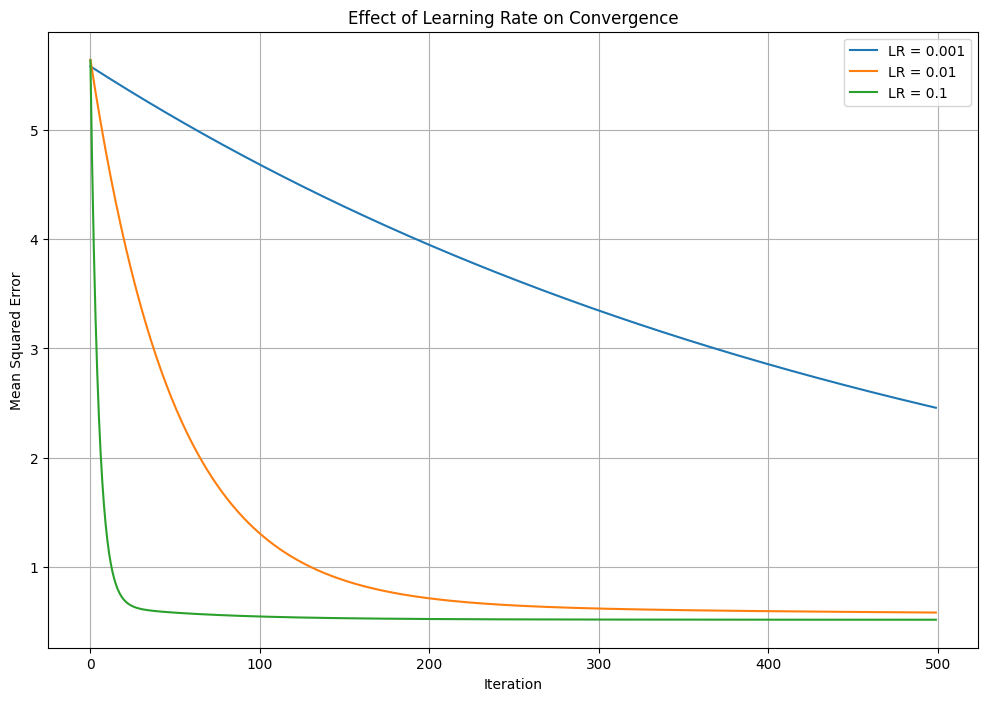

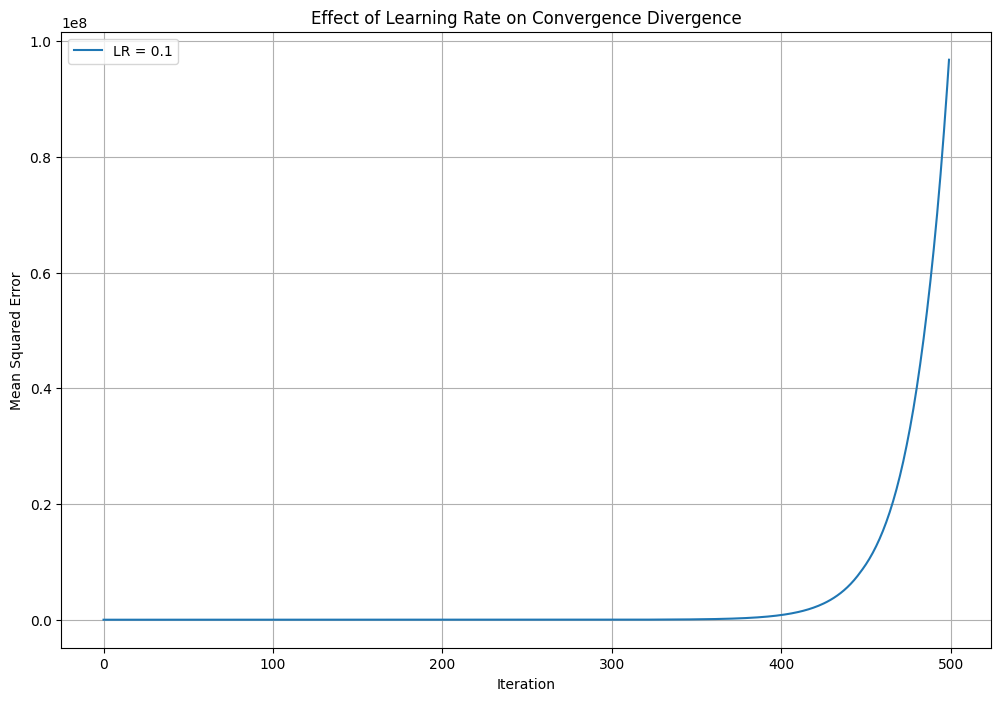

In [189]:
learning_rates = [0.001, 0.01, 0.1]

plt.figure(figsize=(12, 8))
for lr in learning_rates:
    weights_lr, loss_lr = linear_regression(X_train_bias, y_train, learning_rate=lr, num_iterations=500)
    plt.plot(loss_lr, label=f'LR = {lr}')

plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True)
plt.show()

# Divergence
plt.figure(figsize=(12, 8))
weights_lr, loss_lr = linear_regression(X_train_bias, y_train, learning_rate=1, num_iterations=500)
plt.plot(loss_lr, label=f'LR = {lr}')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Learning Rate on Convergence Divergence')
plt.legend()
plt.grid(True)
plt.show()

Use scikit-learn's Linear Regression model to fit the same training data. Compare the coefficients learned by your gradient descent implementation with those learned by scikit-learn's model. Discuss any discrepancies. Compare the final evaluation metric (MSE) of your model against the scikit-learn model. (1 pts)


In [190]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)

y_train_pred_sk = sklearn_model.predict(X_train_scaled)
y_test_pred_sk = sklearn_model.predict(X_test_scaled)

train_mse_sk = mean_squared_error(y_train, y_train_pred_sk)
test_mse_sk = mean_squared_error(y_test, y_test_pred_sk)

print("Scikit-learn model:")
print(f"Training MSE: {train_mse_sk:.4f}")
print(f"Test MSE: {test_mse_sk:.4f}")

print("\nGradient Descent model:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

print("\nComparison:")
print(f"Training MSE difference: {abs(train_mse - train_mse_sk):.6f}")
print(f"Test MSE difference: {abs(test_mse - test_mse_sk):.6f}")

Scikit-learn model:
Training MSE: 0.5179
Test MSE: 0.5559

Gradient Descent model:
Training MSE: 0.5480
Test MSE: 0.5672

Comparison:
Training MSE difference: 0.030114
Test MSE difference: 0.011341


### Discussion
The gradient descent implementation converges close to the scikit-learn solution and achieves near-optimal results.  
Small differences exist due to different optimization algorithms.

Discuss how the choice of learning rate and number of iterations impacts the convergence and accuracy of the model.
Analyze the importance of feature scaling in the performance of gradient descent. (1 pts)


In [191]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
iterations_list = [100, 500, 1000, 5000]

results = []

for lr in learning_rates:
    for n_iter in iterations_list:
        weights, loss = linear_regression(X_train_bias, y_train, learning_rate=lr, num_iterations=n_iter)
        y_test_pred = X_test_bias @ weights
        test_mse = mean_squared_error(y_test, y_test_pred)
        results.append((lr, n_iter, test_mse, len(loss)))

print("Learning Rate | Iterations | Test MSE | Actual Iterations")
for lr, n_iter, mse, actual_iter in results:
    print(f"{lr:13.3f} | {n_iter:10d} | {mse:8.4f} | {actual_iter:15d}")

Learning Rate | Iterations | Test MSE | Actual Iterations
        0.001 |        100 |   4.6525 |             100
        0.001 |        500 |   2.4181 |             500
        0.001 |       1000 |   1.2997 |            1000
        0.001 |       5000 |   0.5950 |            5000
        0.010 |        100 |   1.2916 |             100
        0.010 |        500 |   0.5973 |             500
        0.010 |       1000 |   0.5670 |            1000
        0.010 |       5000 |   0.5562 |            5000
        0.100 |        100 |   0.5678 |             100
        0.100 |        500 |   0.5562 |             500
        0.100 |       1000 |   0.5560 |            1000
        0.100 |       5000 |   0.5559 |            1644
        0.500 |        100 |   0.5562 |             100
        0.500 |        500 |   0.5559 |             328
        0.500 |       1000 |   0.5559 |             327
        0.500 |       5000 |   0.5559 |             328
        1.000 |        100 |   0.6005 |       


Comparison:
Unscaled data - Test MSE: 10607673838791934607360.0000
Scaled data - Test MSE: 5.0940
Difference: 10607673838791934607360.0000


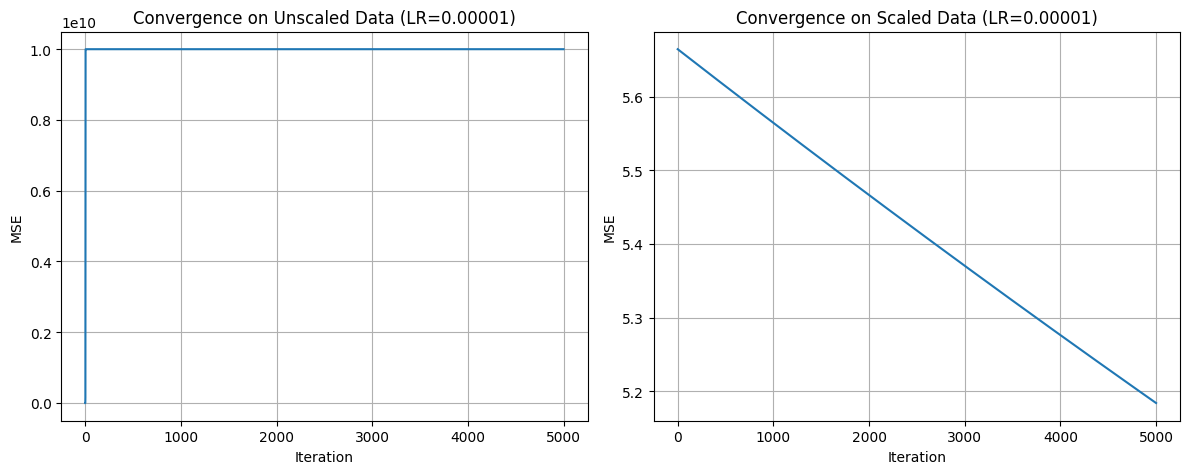

In [192]:
weights_unscaled, loss_unscaled = linear_regression(X_train, y_train, learning_rate=0.00001, num_iterations=5000)
y_test_pred_unscaled = X_test@ weights_unscaled
test_mse_unscaled = mean_squared_error(y_test, y_test_pred_unscaled)

weights_scaled, loss_scaled = linear_regression(X_train_bias, y_train, learning_rate=0.00001, num_iterations=5000)
y_test_pred_scaled = X_test_bias @ weights_scaled
test_mse_scaled = mean_squared_error(y_test, y_test_pred_scaled)

print("\nComparison:")
print(f"Unscaled data - Test MSE: {test_mse_unscaled:.4f}")
print(f"Scaled data - Test MSE: {test_mse_scaled:.4f}")
print(f"Difference: {abs(test_mse_unscaled - test_mse_scaled):.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_unscaled)
plt.title('Convergence on Unscaled Data (LR=0.00001)')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(loss_scaled)
plt.title('Convergence on Scaled Data (LR=0.00001)')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

### Discussion

Learning Rate Impact: too small lr leads to low convergence, may not reach optimum; too large lr leads to divergence

Number of Iterations: few leads to not reaching optimum; many leads to wast omputational, risk of overfitting

Feature Scaling Importance: gradient descent doesn't converge without feature scaling(required throughtfull tuning); allows to use larger learning rates; improves numerical stability

### 1.5 (2 pts)

Let the mini-batch gradient be

$$
g_B(x) = \frac{1}{|B|} \sum_{i \in B} g(x, \xi_i).
$$

- Show that the mini-batch gradient is unbiased, i.e.
   
   $\mathbb{E}[g_B(x)] = \nabla f(x)$.
   

- Derive how the variance scales with the batch size:
   
   $\mathrm{Var}(g_B(x)) = \frac{1}{|B|} \, \mathrm{Var}(g(x, \xi))$.
   

- Discuss the tradeoff between:
   - variance reduction,
   - computational cost per iteration,
   - convergence speed of SGD.



1. Unbiasedness of mini-batch gradient:

Given that $\mathbb{E}[g(x, \xi_i)] = \nabla f(x)$ for each sample $i$,
and assuming i.i.d. samples:
$$
\mathbb{E}[g_B(x)] = \mathbb{E}\left[\frac{1}{|B|} \sum_{i \in B} g(x, \xi_i)\right]
= \frac{1}{|B|} \sum_{i \in B} \mathbb{E}[g(x, \xi_i)]
= \frac{1}{|B|} \sum_{i \in B} \nabla f(x)
= \nabla f(x)
$$

2. Variance scaling with batch size:

Assuming i.i.d. samples with variance $\sigma^2 = \mathrm{Var}(g(x, \xi))$:
$$
\mathrm{Var}(g_B(x)) = \mathrm{Var}\left(\frac{1}{|B|} \sum_{i \in B} g(x, \xi_i)\right)
= \frac{1}{|B|^2} \sum_{i \in B} \mathrm{Var}(g(x, \xi_i))
= \frac{1}{|B|^2} \cdot |B| \cdot \sigma^2
= \frac{1}{|B|} \sigma^2
$$

3. Tradeoff analysis:

- Variance reduction: larger batch sizes reduce variance proportionally to $1/|B|$.

- Computational cost per iteration: larger batches require more computations, increasing time per iteration.

- Convergence speed:
  - For small batches: high variance, but each iteration is cheap
  - For large batches: low variance, but computationally expensive

### 1.6 (8 pts)

Consider the empirical risk minimization problem with regularizer:

$$
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w\|^2_2,
$$

where $\ell: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ is a loss function, $g: \mathbb{R}^d \times \mathbb{R}^x \to \mathbb{R}$ is a model, $w$ are parameters of the model, $(x_i, y_i)_{i=1}^n$ is data of objects $x_i \in \mathbb{R}^x$ and labels $y_i \in \mathbb{R}$.

We use the linear model $g(w,x) = w^T x$ and the logistic/sigmoid loss function: $\ell(z,y) = \ln(1 + \exp(-y z))$ ($y$ must take only 2 values $0$ or $1$).
As we already know, the resulting problem is called a logistic regression problem.

This problem can be rewritten as follows:
$$
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{s} \sum\limits_{j=1}^s f_j(w) := \frac{1}{s} \sum\limits_{j=1}^s \left[\frac{1}{b} \sum\limits_{i=1}^b \ell (g(w, x_{(j-1)b + i}), y_{(j-1)b + i}) + \frac{\lambda}{2} \| w\|^2_2\right],
$$
where $b$ is the batch size, $s$ is the number of batches, and $b s = n$ is the total sample size.

The gradient of $f_j$:
$$
\nabla f_j(w) = \frac{1}{b} \sum_{i=1}^b \frac{-y_{(j-1)b + i} x_{(j-1)b + i}}{1 + \exp(y_{(j-1)b + i} w^T x_{(j-1)b + i})}.
$$
The Lipschitz constant of the gradient $\nabla f_j$ can be estimated as $L_j = \frac{1}{4b} \sum\limits_{i=1}^b \|x_{(j-1)b + i}\|_2^2$.

We will work with The Breast Cancer Wisconsin dataset from sklearn.

In [193]:
import numpy as np
import time
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def load_and_preprocess_data():
    data = load_breast_cancer()
    X = data.data
    y = data.target
    
    # y = 2 * y - 1  # convert 0,1 to -1,1
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

(1 pts) Implement the ability to uniformly divide the training part of the dataset into batches of size $b$ ($b$ is a parameter).

In [194]:
def create_batches(X, y, b):
    """
    Split data into batches.
    Returns: list of (X_batch, y_batch)
    """
    m = X.shape[0]
    indices = np.random.permutation(m)
    
    batches = []
    for i in range(0, m, b):
        if i + b <= m:
            batch_indices = indices[i:i+b]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            batches.append((X_batch, y_batch))
    
    return batches

(1 pts) Implement the SGD method:
$$
w^{k+1} = w^k - \gamma_k \nabla f_{j_k} (w^k),
$$
where the number $j_k$ is generated independently and uniformly from $1,\ldots,s$. For the tasks below, you may need to be able to measure the running time of the method.

In [195]:
class SGD:
    def __init__(self, lambda_reg=0.01):
        self.lambda_reg = lambda_reg
        self.w = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, X, y, w):
        z = X @ w
        logistic_loss = np.mean(np.log(1 + np.exp(-y * z)))
        reg_loss = 0.5 * self.lambda_reg * np.sum(w**2)
        return logistic_loss + reg_loss
    
    def gradient_batch(self, X_batch, y_batch, w):
        b = X_batch.shape[0]
        z = X_batch @ w
        exp_term = np.exp(y_batch * z)
        
        grad_logistic = -np.mean((y_batch[:, np.newaxis] * X_batch) / (1 + exp_term)[:, np.newaxis], axis=0)
        
        grad_reg = self.lambda_reg * w
        
        return grad_logistic + grad_reg
    
    def fit(self, X, y, batch_size=10, learning_rate=0.01, n_epochs=100, step_strategy='constant', verbose = True):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        
        self.loss_history = []
        self.grad_norm_history = []
        self.accuracy_history = []
        
        def get_learning_rate(iteration):
            if step_strategy == 'constant':
                return learning_rate
            elif step_strategy == 'sqrt':
                return learning_rate / np.sqrt(iteration + 1)
            elif step_strategy == 'linear':
                return learning_rate / (iteration + 1)
            else:
                return learning_rate
        
        iteration = 0
        start_time = time.time()
        
        for epoch in range(n_epochs):
            batches = create_batches(X, y, batch_size)
            
            for X_batch, y_batch in batches:
                grad = self.gradient_batch(X_batch, y_batch, self.w)
                lr = get_learning_rate(iteration)
                self.w -= lr * grad
                
                loss_val = self.loss(X, y, self.w)
                grad_norm = np.linalg.norm(grad)
                y_pred = self.predict(X)
                acc = accuracy_score((y > 0).astype(int), (y_pred > 0).astype(int))
                
                self.loss_history.append(loss_val)
                self.grad_norm_history.append(grad_norm)
                self.accuracy_history.append(acc)
                
                iteration += 1
            
            if verbose and epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {self.loss_history[-1]:.4f}, "
                      f"Grad Norm: {self.grad_norm_history[-1]:.4f}, "
                      f"Accuracy: {self.accuracy_history[-1]:.4f}")
        
        self.training_time = time.time() - start_time
        if verbose: 
            print(f"Training completed in {self.training_time:.2f} seconds")
        
        return self
    
    def predict(self, X):
        return X @ self.w
    
    def predict_proba(self, X):
        scores = X @ self.w
        proba_positive = self.sigmoid(scores)
        return np.column_stack([1 - proba_positive, proba_positive])
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score((y > 0).astype(int), (y_pred > 0).astype(int))

(1 pts) Solve the optimization problem on the training sample using the implemented method. Take $b=10$, and the step is $\gamma_k \equiv \frac{1}{L}$. Draw the convergence plot: the value of the convergence criterion (e.g. $\frac{\|\nabla f(w^k)\|}{\|\nabla f(w^0)\|}$) from the iteration number. Make a conclusion.

Epoch 0, Loss: 0.3588, Grad Norm: 0.2439, Accuracy: 0.9670
Epoch 10, Loss: 0.3217, Grad Norm: 0.0332, Accuracy: 0.9824
Epoch 20, Loss: 0.3210, Grad Norm: 0.0293, Accuracy: 0.9802
Epoch 30, Loss: 0.3209, Grad Norm: 0.0745, Accuracy: 0.9824
Epoch 40, Loss: 0.3209, Grad Norm: 0.0246, Accuracy: 0.9824
Training completed in 0.35 seconds


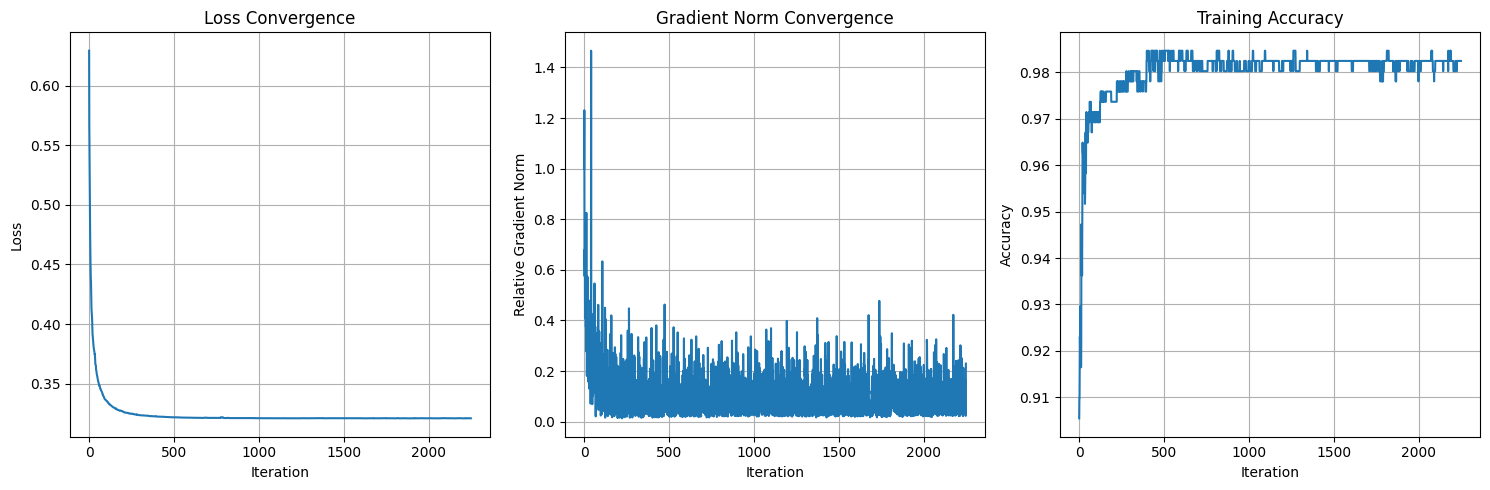


Test Accuracy: 0.9912


In [196]:
X, y = load_and_preprocess_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def estimate_L(X, batch_size=10):
    n_samples = X.shape[0]
    L_values = []
    
    for i in range(0, n_samples, batch_size):
        if i + batch_size <= n_samples:
            X_batch = X[i:i+batch_size]
            norm_sq_sum = np.sum(np.linalg.norm(X_batch, axis=1)**2)
            L_batch = norm_sq_sum / (4 * batch_size)
            L_values.append(L_batch)
    
    return np.mean(L_values)

L_estimate = estimate_L(X_train, batch_size=10)
model = SGD(lambda_reg=0.01)
model.fit(X_train, y_train, batch_size=10, learning_rate=1/L_estimate, n_epochs=50, step_strategy='constant')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.grid(True)

plt.subplot(1, 3, 2)
grad_norm_initial = model.grad_norm_history[0]
relative_grad_norm = [gn / grad_norm_initial for gn in model.grad_norm_history]
plt.plot(relative_grad_norm)
plt.xlabel('Iteration')
plt.ylabel('Relative Gradient Norm')
plt.title('Gradient Norm Convergence')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(model.accuracy_history)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

test_accuracy = model.score(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

### Discussion

Using γ = 1/L provides stable convergence. Loss decreases and gradient norm reduce rapidly(150 iterations), gradient norm has big noise over iterations.  
Training accuracy improves and stabilizes. The method achieves good test accuracy (>98%).

(2 pts) Vary the batch size: $b=1,10,100,1000$, and take the step size equal to $\gamma_k \equiv \frac{1}{L}$. Draw the convergence plot: the value of the convergence criterion from the iteration number for each $b$. Does this plot reflect a fair comparison? Why? Figure out how to compare the results to each other more honestly and draw a new comparison plot. Make a conclusion.

In [197]:
batch_sizes = [1, 10, 100] # 1000 -- too large batch size for this dataset.
results = {}

for b in batch_sizes:
    print(f"\nTraining with batch size: {b}")
    
    L_b = estimate_L(X_train, batch_size=b)
    learning_rate = 1 / L_b
    
    model = SGD(lambda_reg=0.01)
    model.fit(X_train, y_train, batch_size=b, learning_rate=learning_rate, n_epochs=50, step_strategy='constant', verbose=False)
    
    results[b] = {
        'loss_history': model.loss_history,
        'grad_norm_history': model.grad_norm_history,
        'accuracy_history': model.accuracy_history,
        'training_time': model.training_time,
        'test_accuracy': model.score(X_test, y_test)
    }
    
    print(f"  Learning rate: {learning_rate:.6f}")
    print(f"  Training time: {model.training_time:.2f}s")
    print(f"  Test accuracy: {model.score(X_test, y_test):.4f}")


print(f"{'Batch Size':<10} {'Learning Rate':<15} {'Time (s)':<10} {'Test Acc':<10} {'Iter/Epoch':<10}")
for b in batch_sizes:
    lr = 1 / estimate_L(X_train, batch_size=b)
    iter_per_epoch = len(X_train) / b
    print(f"{b:<10} {lr:<15.6f} {results[b]['training_time']:<10.2f} "
          f"{results[b]['test_accuracy']:<10.4f} {iter_per_epoch:<10.1f}")


Training with batch size: 1
  Learning rate: 0.131412
  Training time: 3.60s
  Test accuracy: 0.9825

Training with batch size: 10
  Learning rate: 0.131706
  Training time: 0.35s
  Test accuracy: 0.9912

Training with batch size: 100
  Learning rate: 0.128804
  Training time: 0.03s
  Test accuracy: 0.9825
Batch Size Learning Rate   Time (s)   Test Acc   Iter/Epoch
1          0.131412        3.60       0.9825     455.0     
10         0.131706        0.35       0.9912     45.5      
100        0.128804        0.03       0.9825     4.5       


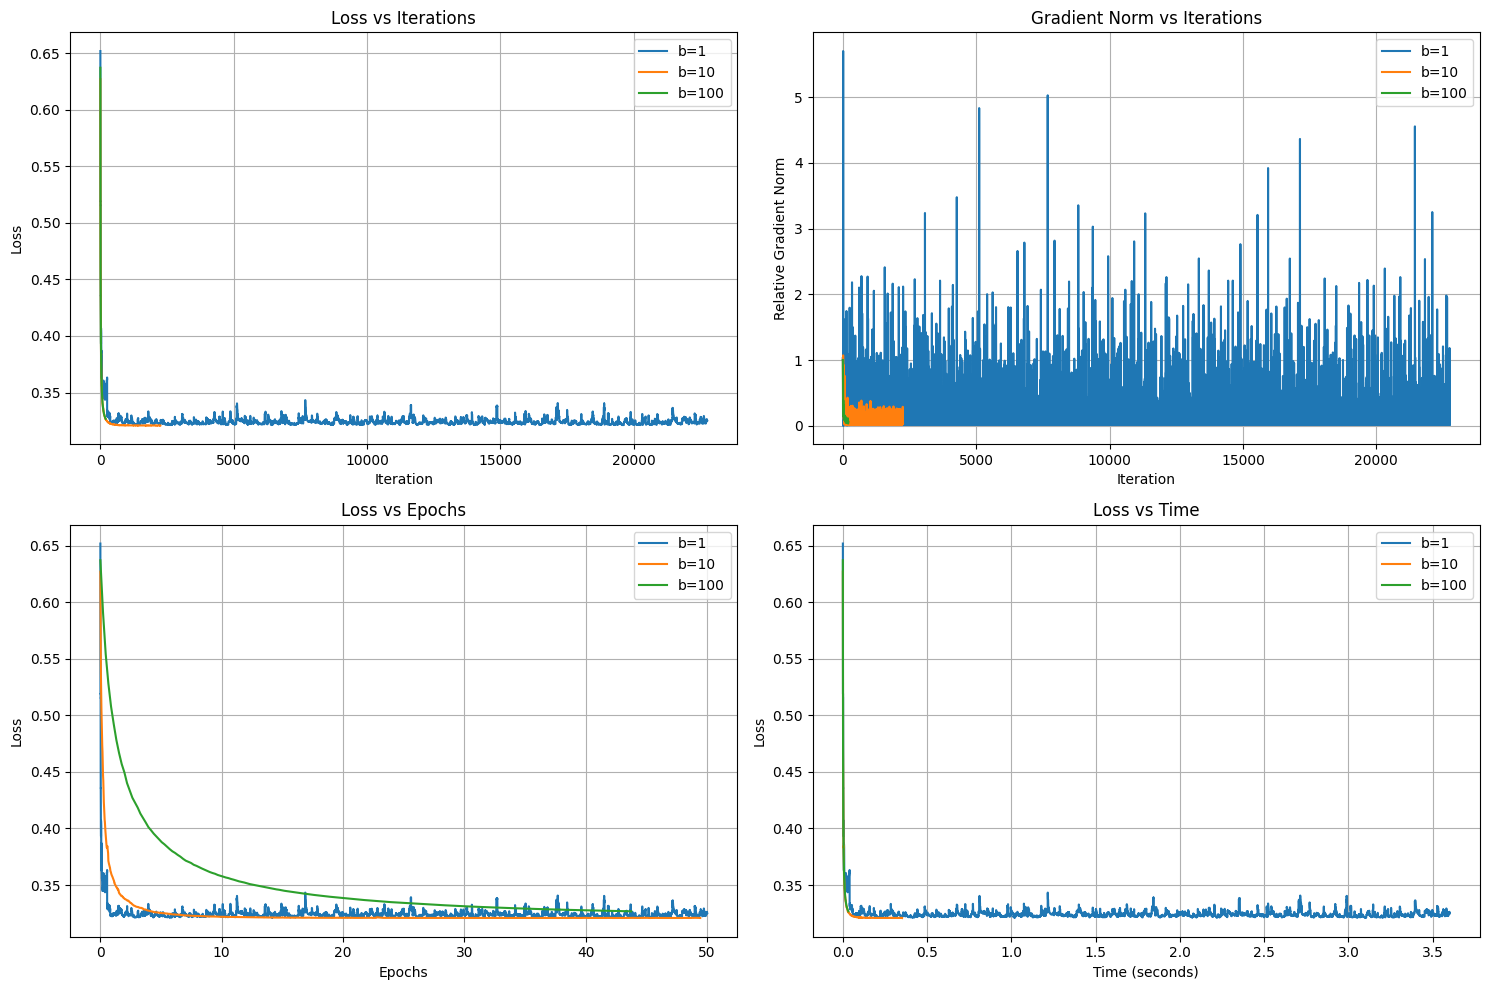

In [198]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for b in batch_sizes:
    plt.plot(results[b]['loss_history'], label=f'b={b}')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for b in batch_sizes:
    grad_norm_initial = results[b]['grad_norm_history'][0]
    relative_grad_norm = [gn / grad_norm_initial for gn in results[b]['grad_norm_history']]
    plt.plot(relative_grad_norm, label=f'b={b}')
plt.xlabel('Iteration')
plt.ylabel('Relative Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
for b in batch_sizes:
    iterations_per_epoch = len(X_train) / b
    x_epochs = [i / iterations_per_epoch for i in range(len(results[b]['loss_history']))]
    plt.plot(x_epochs, results[b]['loss_history'], label=f'b={b}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
for b in batch_sizes:
    total_time = results[b]['training_time']
    n_points = len(results[b]['loss_history'])
    time_points = np.linspace(0, total_time, n_points)
    plt.plot(time_points, results[b]['loss_history'], label=f'b={b}')
plt.xlabel('Time (seconds)')
plt.ylabel('Loss')
plt.title('Loss vs Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Discussion

All batch sizes achive great results (acc > 98%). Batch size = 100 shows the best time (0.03s, much smaller than other variants), but slightly loses in accuracy to batch size = 10 (99% vs 98%).  
Analyzed dataset is too small for batch size = 1000.

Comparison methods analysis:  
- Iteration-based comparison is unfair because different batch sizes lead to different computations per iteration.  
- Epoch-based comparison is better, because each epoch processes all data once. Also it shows convergence per pass through dataset.  
- Time-based comparison is the best because it accounts for computational cost. In combintation with epoch-based can be usefull.

(2 pts) Let us fix $b=10$ and try to change the strategy of choosing the step:

1) $\gamma_k \equiv \frac{1}{L}$ as we did before,

2) $\gamma_k = \frac{1}{\sqrt{k+1}}$,

3) $\gamma_k = \frac{1}{k+1}$.

Draw the convergence plot: the value of the convergence criterion from the iteration number. Make a conclusion.

In [199]:
strategies = ['constant', 'sqrt', 'linear']
results_strategies = {}

L_10 = estimate_L(X_train, batch_size=10)
base_lr = 1 / L_10

for strategy in strategies:
    print(f"\nTraining with strategy: {strategy}")
    
    model = SGD(lambda_reg=0.01)
    model.fit(X_train, y_train, batch_size=10, learning_rate=base_lr, n_epochs=50, step_strategy=strategy, verbose = False)
    
    results_strategies[strategy] = {
        'loss_history': model.loss_history,
        'grad_norm_history': model.grad_norm_history,
        'accuracy_history': model.accuracy_history,
        'test_accuracy': model.score(X_test, y_test),
        'training_time': model.training_time
    }
    
    print(f"  Test accuracy: {model.score(X_test, y_test):.4f}")
    print(f"  Training time: {model.training_time:.2f}s")

print(f"{'Strategy':<20} {'Test Accuracy':<15} {'Training Time':<15}")
for strategy in strategies:
    acc = results_strategies[strategy]['test_accuracy']
    time_val = results_strategies[strategy]['training_time']
    print(f"{strategy:<20} {acc:<15.4f} {time_val:<15.2f}")


Training with strategy: constant
  Test accuracy: 0.9912
  Training time: 0.35s

Training with strategy: sqrt
  Test accuracy: 0.9825
  Training time: 0.35s

Training with strategy: linear
  Test accuracy: 0.9825
  Training time: 0.34s
Strategy             Test Accuracy   Training Time  
constant             0.9912          0.35           
sqrt                 0.9825          0.35           
linear               0.9825          0.34           


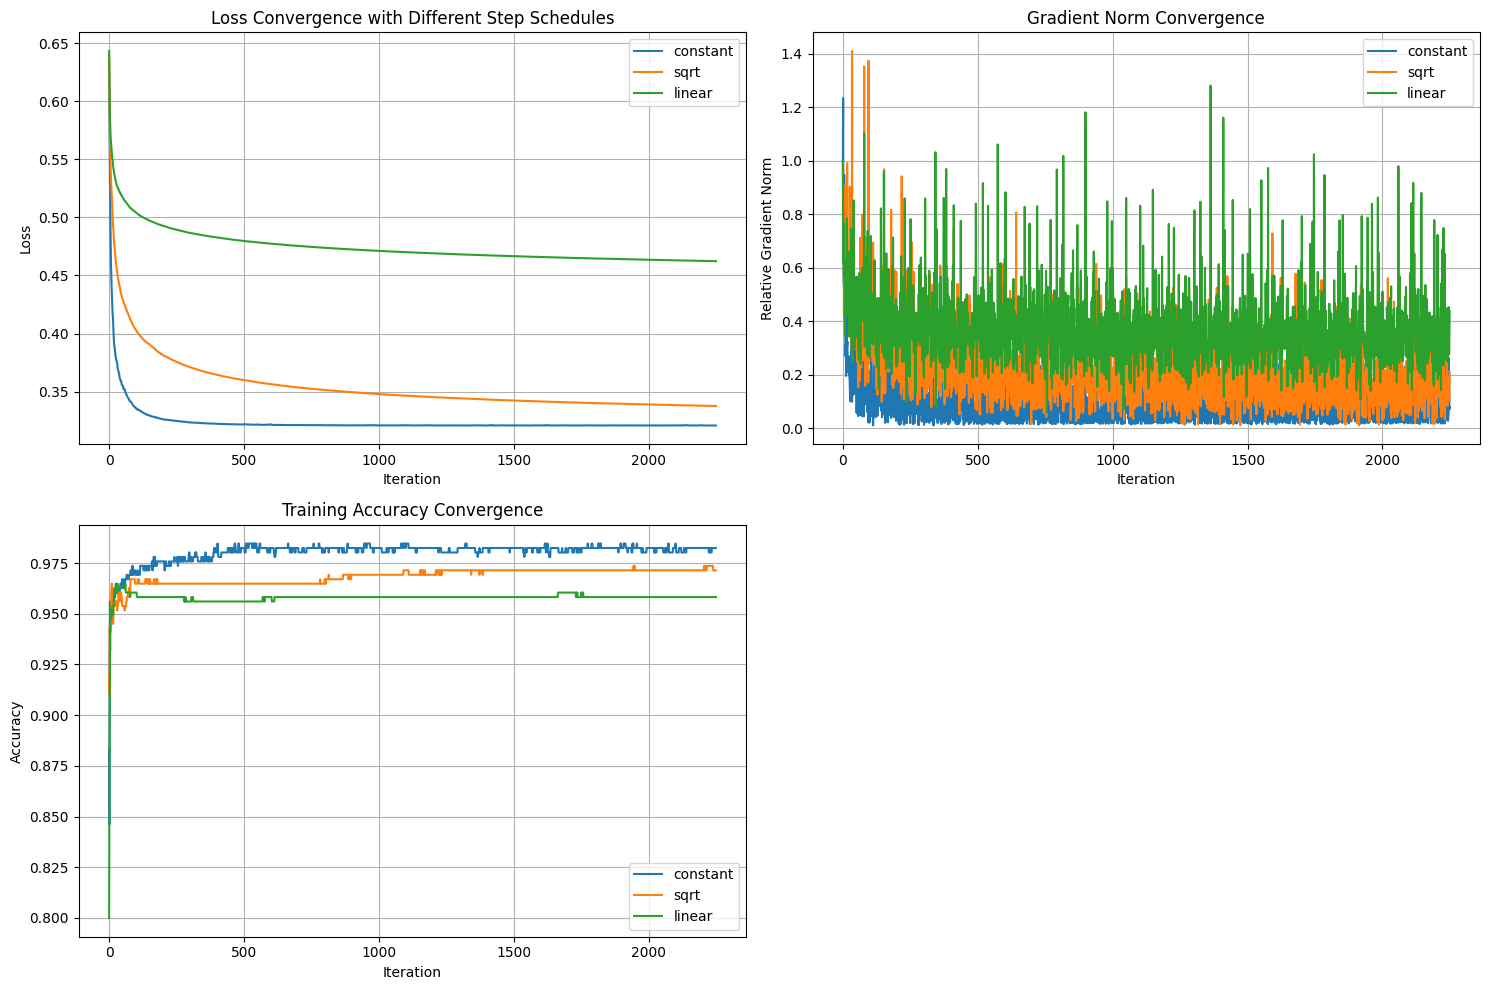

In [200]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for strategy in strategies:
    plt.plot(results_strategies[strategy]['loss_history'], label=strategy)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence with Different Step Schedules')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for strategy in strategies:
    grad_norm_initial = results_strategies[strategy]['grad_norm_history'][0]
    relative_grad_norm = [gn / grad_norm_initial for gn in results_strategies[strategy]['grad_norm_history']]
    plt.plot(relative_grad_norm, label=strategy)
plt.xlabel('Iteration')
plt.ylabel('Relative Gradient Norm')
plt.title('Gradient Norm Convergence')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
for strategy in strategies:
    plt.plot(results_strategies[strategy]['accuracy_history'], label=strategy)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Convergence')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Discussion

Training time is approximately same for all methods, as well as test accuracy value (>97%). However, constant step has the best training accurasy (>98%, comparing with >97% for sqrt and >95% for linear methods).  

Decreasing sqrt step much slower, and probably requires more time on convergense. At the same time, linear decreasing step (1/(k+1)) is too fast and may stop learning too early.  

(1 pts) Look at the accuracy of the model trained with SGD. Repeat 2 previous steps, but now plot the accuracy dependence, not the convergence criterion. Make a conclusion.

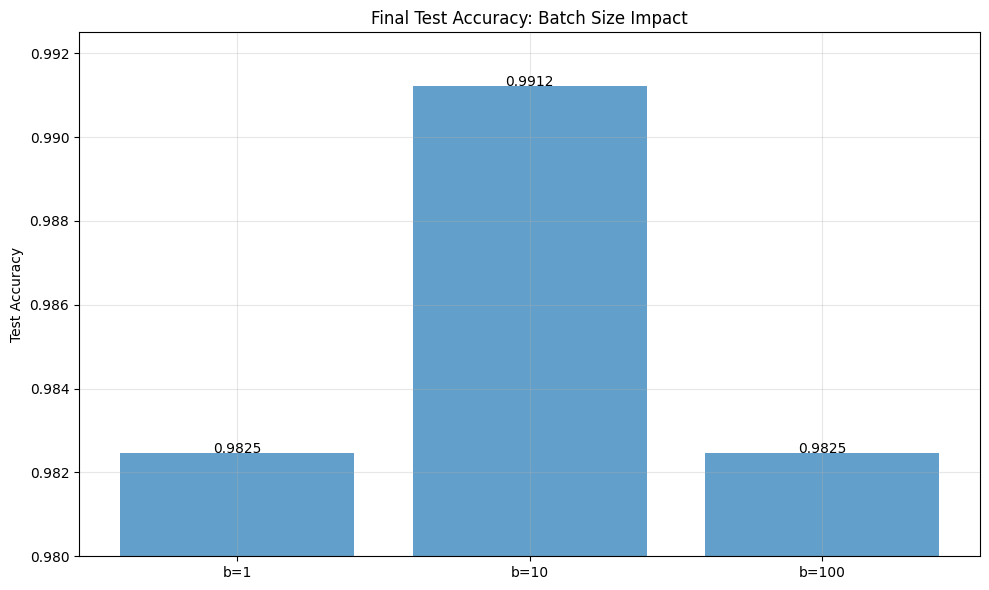

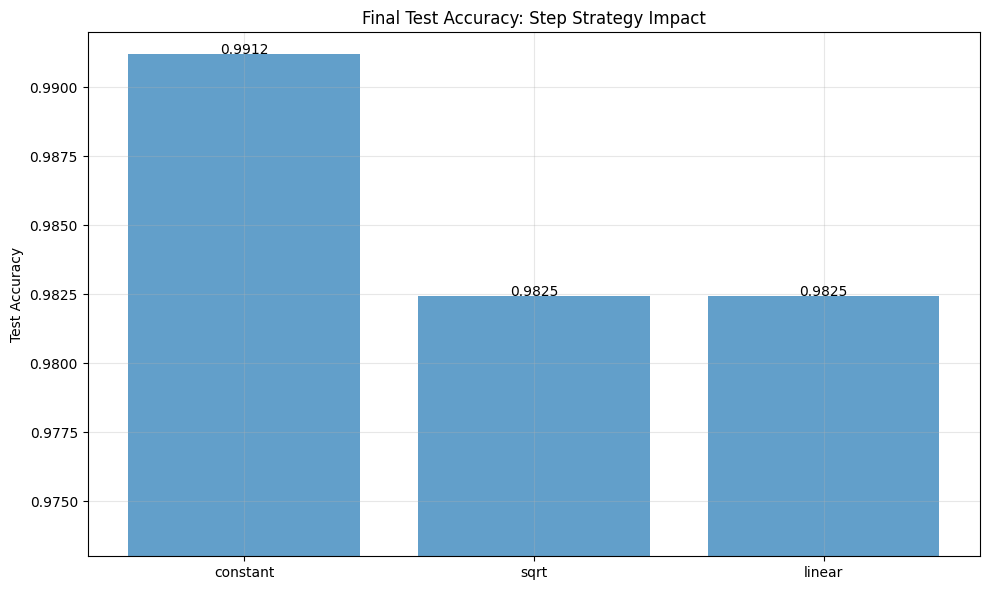

In [201]:
plt.figure(figsize=(10, 6))

batch_acc = [results[b]['test_accuracy'] for b in batch_sizes]
x_pos = range(len(batch_sizes))
plt.bar(x_pos, batch_acc, alpha=0.7, label='Batch Size')
plt.xticks(x_pos, [f'b={b}' for b in batch_sizes])
plt.ylim(0.98, 0.9925)
plt.ylabel('Test Accuracy')
plt.title('Final Test Accuracy: Batch Size Impact')
plt.grid(True, alpha=0.3)

for i, v in enumerate(batch_acc):
    plt.text(i, v, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
strategy_acc = [results_strategies[s]['test_accuracy'] for s in strategies]
strategy_names_display = [s for s in strategies]
x_pos = range(len(strategies))

plt.bar(x_pos, strategy_acc, alpha=0.7)
plt.xticks(x_pos, strategy_names_display)
plt.ylabel('Test Accuracy')
plt.title('Final Test Accuracy: Step Strategy Impact')
plt.grid(True, alpha=0.3)
plt.ylim(0.973, 0.992)

for i, v in enumerate(strategy_acc):
    plt.text(i, v, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

### Discussion

As mentioned earlier, all options achieved good results (>97%). The best is const step size and batch_size = 10 (equal to batch_size = 1 in this case, but faster).  
Perhaps the 1/sqrt step ($\frac{1}{\sqrt{k+1}}$) would achieve greater accuracy, but it converges much slower than other methods.